Bad Pixel Testing Notebook

In [21]:
import numpy as np
import sys
sys.path.append("C:\Program Files\FirstLightImaging\FliSdk\Python\demo")
import FliSdk_V2 as sdk
import derpy
from matplotlib import pyplot as plt


<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Brewster\AppData\Local\Temp\ipykernel_12268\2469720873.py:3: SyntaxWarning: invalid escape sequence '\P'
  sys.path.append("C:\Program Files\FirstLightImaging\FliSdk\Python\demo")


In [80]:
cam.close()

In [22]:
cam = derpy.CRED2(set_temperature = -40, fps = 100, tint = 0.1, temp_tolerance = 0.5, conversion_gain = 'high')

Updating...
Sensor Temperature: -39.96C
Motherboard Temperature: 45.0C
Frontend Temperature: 49.25C
Powerboard Temperature: 54.5C
Peltier Temperature: 17.64C
Heatsink Temperature: 51.82C
***********************
Sensor Temperature: -39.96C
Motherboard Temperature: 45.0C
Frontend Temperature: 49.25C
Powerboard Temperature: 54.5C
Peltier Temperature: 17.64C
Heatsink Temperature: 51.82C
***********************
Final Sensor Temperature -39.96C
Current camera tint: 0.102394ms


Once camera is connected, try taking frames 

# Code Segment Hijacked by Briley + Rebecca

Current camera tint: 50.002251ms


Text(0.5, 1.0, '99 ms Dark')

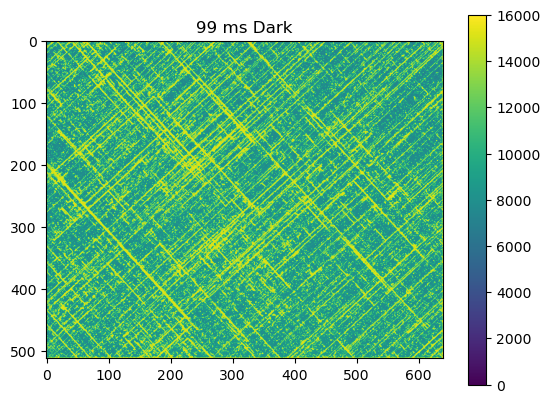

In [62]:
#set camera parameters
cam.fps  = 15
cam.tint =50
cam.conversion_gain = 'lo'

# taking a handful of dark frames and showing the average image
n_frames = 10
drk_test = cam.take_median_image(n_frames)

# plotting
plt.figure(0)
plt.imshow(drk_test, vmin = 0, vmax = 16000)
plt.colorbar()
plt.title('99 ms Dark')

Text(0.5, 1.0, '99 Ambient Frame')

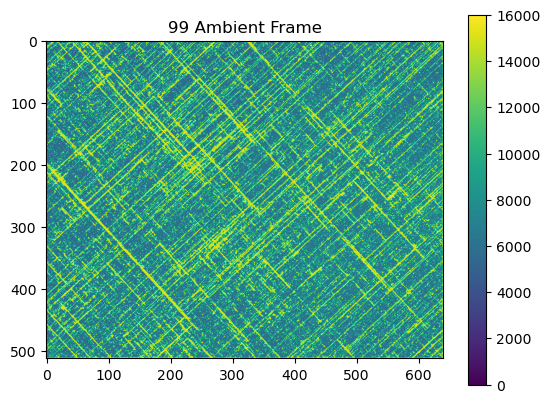

In [63]:
# Now taking ambient frames - taken with lights off and curtains closed
ambient_test = cam.take_median_image(n_frames)

# plotting
plt.figure(0)
plt.imshow(ambient_test, vmin = 0, vmax = 16000)
plt.colorbar()
plt.title('99 Ambient Frame')

Text(0.5, 1.0, '99 ms White Screen Frame')

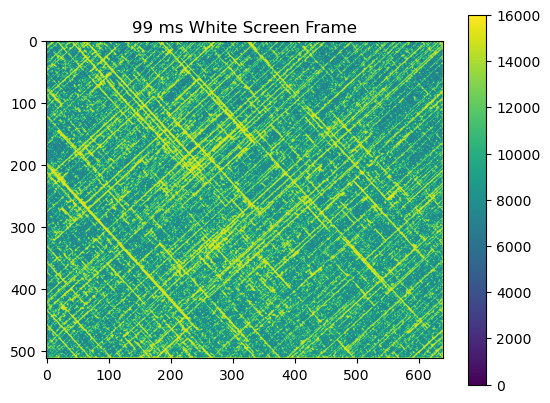

In [64]:
# Now taking white phone screen backgrounds
white_screen_test = cam.take_median_image(n_frames)

# plotting
plt.figure(0)
plt.imshow(white_screen_test, vmin = 0, vmax = 16000)
plt.colorbar()
plt.title('99 ms White Screen Frame')

8481.0
6966.0
8967.0
1454.0


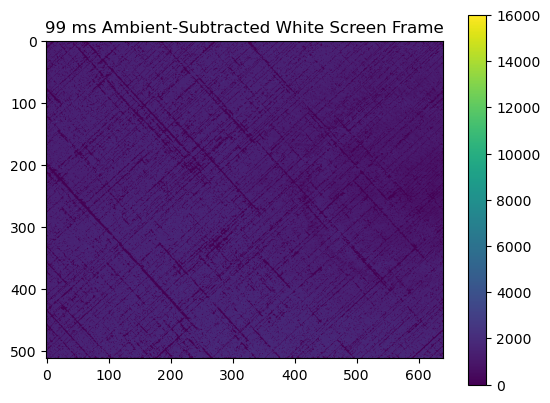

In [79]:
# Plotting dark subtracted white screen frame

# plotting
plt.figure(0)
plt.imshow(white_screen_test - ambient_test, vmin = 0, vmax = 16000)
plt.colorbar()
plt.title('99 ms Ambient-Subtracted White Screen Frame')

print(np.median(white_screen_test))
print(np.median(ambient_test))
print(np.median(drk_test))

print(np.median(white_screen_test - ambient_test))

If we are taking frames, we can start testing whether we can control the bad pixel mode for the camera

In [5]:
sdk.FliCredTwo.EnableBadPixel(cam.context, False)

True

^Maybe that works? Let's Try Taking two frames, one with Flase, one with True

Text(0.5, 1.0, 'False Dark')

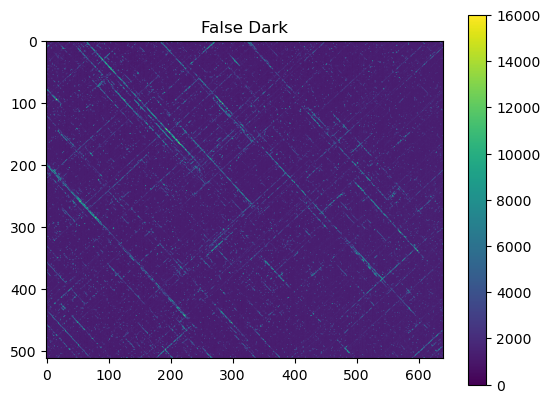

In [6]:
# take a dark with bad pixel as false
sdk.FliCredTwo.EnableBadPixel(cam.context, False)
False_drk = cam.take_median_image(10)


#plotting 
plt.figure()
plt.imshow(False_drk, vmin = 0, vmax = 16000)
plt.colorbar()
plt.title('False Dark')

Text(0.5, 1.0, 'True Dark')

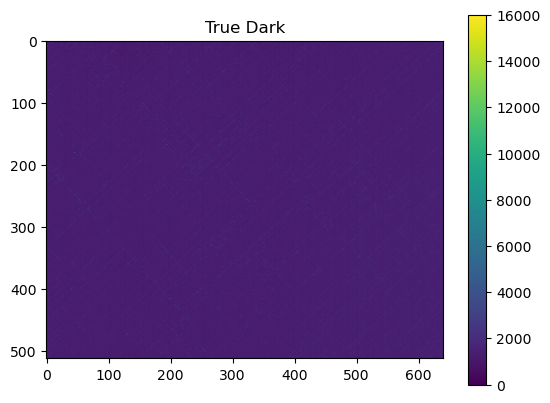

In [7]:
# take a dark with bad pixel as true
sdk.FliCredTwo.EnableBadPixel(cam.context, True)
True_drk = cam.take_median_image(10)

# plotting
plt.imshow(True_drk, vmin = 0, vmax = 16000)
plt.colorbar()
plt.title('True Dark')

Work's pretty well!

We want to know exactly what the bad pixel correction is doing here; Fli has a method that returns what mode of bad pixel correction we're using

In [19]:
cam.getKindOfBadPixelCorrection()

AttributeError: 'CRED2' object has no attribute 'getKindOfBadPixelCorrection'

Time to start thinking about a metric for measuring how well our bad pixel correction works...standard deviation of total population? RMS deviation from a sample of known good pixels?